<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/get_cvs_then_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib.request
import codecs

http_response = urllib.request.urlopen('http://www.city.hachioji.tokyo.jp/contents/open/002/p005866_d/fil/nenreibetsu_jinkou_2506.csv')
if http_response.code == 200:
  print('Sucess to get CSV file from Internet')

  # 文字コード(text_encode)を取得する．
  text_encode = http_response.info().get_content_charset() 
  print(text_encode)
  # ここで出てきた文字コードを次に突っ込めばいいのだが，
  # htmlとは違い，CSVファイルには文字コードが入っていないことが多い．
  # なので文字コードはなんとなく指定するしかない．
  
  # 文字コード
  csv_text = http_response.read().decode('SHIFT-JIS')
  # 公的機関とかのCSVファイルは，文字コードが大体SHIFT-JIS
  # まずutf-8を試して，ダメならSHIFT-JISにしてみること

  #確かめるために一度表示
  print(csv_text)
  
  #pandasの機能で読み込むために，一度ファイルとして書き出しておく
  temporary_writing_file = codecs.open('current_analyzing.csv', mode='w', encoding='utf-8')
  temporary_writing_file.write(csv_text)
  temporary_writing_file.close()
  
  # ここまでの処理が成功したら以下の文をプリントする
  print('Sucsess to save downloaded CSV file as utf-8')
  
else:
  # httpで取得することが失敗だったら，失敗したコードを表示
  print('Failed to get CSV file from internet. Error Code is:', http_response.code)
  

Sucess to get CSV file from Internet
None
対象年月,年齢,人口＿合計,人口＿男,人口＿女
201306,0,3989,2041,1948
201306,1,4249,2217,2032
201306,2,4494,2318,2176
201306,3,4719,2440,2279
201306,4,4722,2382,2340
201306,5,4762,2409,2353
201306,6,4886,2534,2352
201306,7,4831,2511,2320
201306,8,4700,2413,2287
201306,9,4889,2476,2413
201306,10,5005,2574,2431
201306,11,5125,2614,2511
201306,12,5159,2676,2483
201306,13,5307,2751,2556
201306,14,5237,2694,2543
201306,15,5235,2685,2550
201306,16,5275,2665,2610
201306,17,5271,2706,2565
201306,18,6762,3566,3196
201306,19,7572,4118,3454
201306,20,7610,4127,3483
201306,21,7907,4343,3564
201306,22,7235,3962,3273
201306,23,6758,3644,3114
201306,24,6579,3512,3067
201306,25,6283,3364,2919
201306,26,6236,3315,2921
201306,27,6273,3312,2961
201306,28,6292,3362,2930
201306,29,6349,3310,3039
201306,30,6501,3478,3023
201306,31,6438,3267,3171
201306,32,6595,3408,3187
201306,33,7093,3667,3426
201306,34,7233,3797,3436
201306,35,7519,3954,3565
201306,36,7556,3929,3627
201306,37,8179,4351

In [0]:
import numpy as np
import pandas as pd

# 前のセルで一度utf-8で書き出しておいたCSVを読み込む
dataframe = pd.read_csv('current_analyzing.csv',  encoding='utf-8')
print(dataframe)

dataframe.head()

       対象年月   年齢  人口＿合計  人口＿男  人口＿女
0    201306    0   3989  2041  1948
1    201306    1   4249  2217  2032
2    201306    2   4494  2318  2176
3    201306    3   4719  2440  2279
4    201306    4   4722  2382  2340
5    201306    5   4762  2409  2353
6    201306    6   4886  2534  2352
7    201306    7   4831  2511  2320
8    201306    8   4700  2413  2287
9    201306    9   4889  2476  2413
10   201306   10   5005  2574  2431
11   201306   11   5125  2614  2511
12   201306   12   5159  2676  2483
13   201306   13   5307  2751  2556
14   201306   14   5237  2694  2543
15   201306   15   5235  2685  2550
16   201306   16   5275  2665  2610
17   201306   17   5271  2706  2565
18   201306   18   6762  3566  3196
19   201306   19   7572  4118  3454
20   201306   20   7610  4127  3483
21   201306   21   7907  4343  3564
22   201306   22   7235  3962  3273
23   201306   23   6758  3644  3114
24   201306   24   6579  3512  3067
25   201306   25   6283  3364  2919
26   201306   26   6236  331

,対象年月,年齢,人口＿合計,人口＿男,人口＿女
0,201306,0,3989,2041,1948
1,201306,1,4249,2217,2032
2,201306,2,4494,2318,2176
3,201306,3,4719,2440,2279
4,201306,4,4722,2382,2340


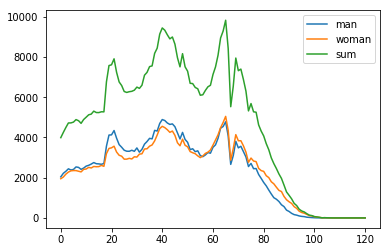

In [0]:
# それぞれ「列」に分解していく

# 年齢の「列」だけを，列のラベルを使って，1次元配列で取り出していく
age = dataframe.loc[:, '年齢']
population_man = dataframe.loc[:, '人口＿男']
population_women = dataframe.loc[:, '人口＿女']
population_sum = dataframe.loc[:, '人口＿合計']

import matplotlib.pyplot as plt

# X軸に年齢， Y軸にそれぞれの人数を入れる
plt.plot(age, population_man, label='man')
plt.plot(age, population_women, label='woman')
plt.plot(age, population_sum, label='sum')

# 判例を表示させる
plt.legend()

#グラフを描画する
plt.show()
